<a href="https://colab.research.google.com/github/ralph27/ZAKA-hands-on/blob/master/Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embeddings


---


© 2024, Zaka AI, Inc. All Rights Reserved


**Objective:** The goal from this exercise is to explore the Word2Vec technique for word embeddings and introduce Stanford's GloVe embedding as well. The libraries we will be using are `Gensim` for Word Embeddings Word2Vec and GloVe, `matplotlib` for visualization and `Scikit-Learn` for Principle Component Analysis models which are used for reducing dimensionality.

## Learn Word2Vec Embedding using Gensim

Word2Vec models require a lot of text, e.g. the entire Wikipedia corpus. However, we will demonstrate the principles using a small in-memory example of text.

Each sentence must be tokenized (divided into words and prepared). The sentences could be text loaded into memory, or an iterator that progressively loads text, required for very large text corpora.

Word2Vec accepts several parameters that affect both training speed and quality:

*   **`size`**: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
*   **`window`**: (default 5) The maximum distance between a target word and words around the target word.
*   **`min_count`**: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
*   **`workers`**: (default 3) The number of threads to use while training.
*   **`sg`**: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

###Building and training a Word2Vec model

We would like to apply Word2Vec on few sentences with the default set of parameters except for the ***min_count*** which will be 1 in our case as the data is small.

In [ ]:
from gensim.models import Word2Vec

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

# train model
model = Word2Vec(sentences, min_count=1)

# summarize the loaded model
print(model)

# summarize vocabulary
# the model.wv property holds the words-and-vectors
#the vocabulary was in the vocab field of the Word2Vec model's wv property, as a dictionary, with the keys being each token (word).

words = list(model.wv.index_to_key)

print(words)

# access vector for one word
print(model.wv['sentence'])

# save model

model.save('model.bin')

Word2Vec<vocab=14, vector_size=100, alpha=0.025>
['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']
[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.498

The model was trained on 14 unique words where each word is represented by a vector of size 100.

In [ ]:
# let's load the model and test it

new_model = Word2Vec.load('model.bin')
# load model and get the vectors of the words 'this' and 'is'
print(new_model.wv['this','is'])



[[-8.2426779e-03  9.2993546e-03 -1.9766092e-04 -1.9672764e-03
   4.6036304e-03 -4.0953159e-03  2.7431143e-03  6.9399667e-03
   6.0654259e-03 -7.5107943e-03  9.3823504e-03  4.6718083e-03
   3.9661205e-03 -6.2435055e-03  8.4599797e-03 -2.1501649e-03
   8.8251876e-03 -5.3620026e-03 -8.1294188e-03  6.8245591e-03
   1.6711927e-03 -2.1985089e-03  9.5136007e-03  9.4938548e-03
  -9.7740470e-03  2.5052286e-03  6.1566923e-03  3.8724565e-03
   2.0227872e-03  4.3050171e-04  6.7363144e-04 -3.8206363e-03
  -7.1402504e-03 -2.0888723e-03  3.9238976e-03  8.8186832e-03
   9.2591504e-03 -5.9759365e-03 -9.4026709e-03  9.7643770e-03
   3.4297847e-03  5.1661171e-03  6.2823449e-03 -2.8042626e-03
   7.3227035e-03  2.8302716e-03  2.8710044e-03 -2.3803699e-03
  -3.1282497e-03 -2.3701417e-03  4.2764368e-03  7.6057913e-05
  -9.5842788e-03 -9.6655441e-03 -6.1481940e-03 -1.2856961e-04
   1.9974159e-03  9.4319675e-03  5.5843508e-03 -4.2906962e-03
   2.7831673e-04  4.9643586e-03  7.6983096e-03 -1.1442233e-03
   4.323

We ended up with two vectors of size 100 each, representing the words 'this' and 'is' respectively.

### Visualize Word Embedding

After learning the word embedding for the text, it's nice to explore it with visualization. However, the word embedding comes in a very high dimensionality. We can use classical projection methods to reduce the high-dimensional word vectors to two- dimensional plots and plot them on a graph.

A method such as Principal Component Analysis (PCA) is normally implemented to reduce the dimensionality of word embedding.

The visualizations can provide a qualitative diagnostic for our learned model.

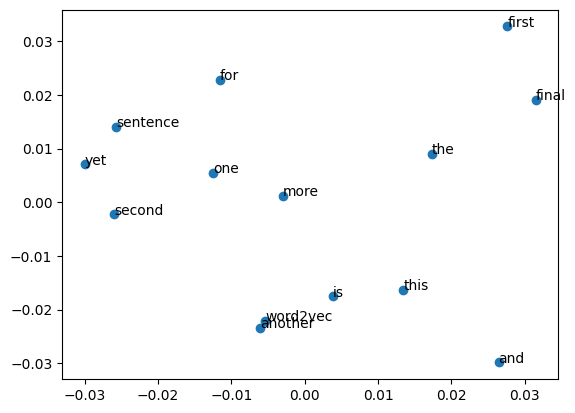

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

# train model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


# fit a 2D PCA model to the vectors

X = model.wv[model.wv.index_to_key]

#reduce dimensionality to 2D
 		#2D model to plot
pca= PCA(n_components=2)
result = pca.fit_transform(X)


# create a scatter plot of the projection
# pull out the 2 dimensions as x and y

pyplot.scatter(result[:,0], result[:,1])
words = list(model.wv.index_to_key)


# annotate the points on the graph with the words themselves
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## Google Word2Vec

Instead of training your own word vectors (which requires a lot of RAM and compute power), you can simply use a pre-trained word embedding. Google has published a pre-trained Word2Vec model that was trained on Google news data (about 100 billion words). It contains 3 million words and phrases and was fit using 300-dimensional word vectors. It is a 1.53 Gigabyte file.

In [ ]:
!pip install "requests[security]"

In [ ]:
import gensim.downloader as api

model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


#### Let's have fun

In [ ]:
# get word vector
model['car']

array([ 0.13085938,  0.00842285,  0.03344727, -0.05883789,  0.04003906,
       -0.14257812,  0.04931641, -0.16894531,  0.20898438,  0.11962891,
        0.18066406, -0.25      , -0.10400391, -0.10742188, -0.01879883,
        0.05200195, -0.00216675,  0.06445312,  0.14453125, -0.04541016,
        0.16113281, -0.01611328, -0.03088379,  0.08447266,  0.16210938,
        0.04467773, -0.15527344,  0.25390625,  0.33984375,  0.00756836,
       -0.25585938, -0.01733398, -0.03295898,  0.16308594, -0.12597656,
       -0.09912109,  0.16503906,  0.06884766, -0.18945312,  0.02832031,
       -0.0534668 , -0.03063965,  0.11083984,  0.24121094, -0.234375  ,
        0.12353516, -0.00294495,  0.1484375 ,  0.33203125,  0.05249023,
       -0.20019531,  0.37695312,  0.12255859,  0.11425781, -0.17675781,
        0.10009766,  0.0030365 ,  0.26757812,  0.20117188,  0.03710938,
        0.11083984, -0.09814453, -0.3125    ,  0.03515625,  0.02832031,
        0.26171875, -0.08642578, -0.02258301, -0.05834961, -0.00

We can also look for closest words in meaning based on the closest vectors in the space.

In [ ]:
# get most similar words
model.most_similar('yellow')

[('red', 0.751919150352478),
 ('bright_yellow', 0.6869138479232788),
 ('orange', 0.6421886682510376),
 ('blue', 0.6376121640205383),
 ('purple', 0.6272757053375244),
 ('yellows', 0.612633228302002),
 ('pink', 0.6098285913467407),
 ('bright_orange', 0.5974606871604919),
 ('Warplanes_streaked_overhead', 0.583052396774292),
 ('participant_LOGIN', 0.5816755294799805)]

Similarly, we can look for some analogies between words

In [ ]:
# queen = (king - man) + woman
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7118193507194519)]


In [ ]:
# (france - paris) + spain = ?
result = model.most_similar(positive=["paris","spain"], negative=["france"], topn=1)
print(result)

[('madrid', 0.5295541882514954)]


And we can use the model to find the word that doesn't match a list of words

In [ ]:
model.doesnt_match(["red", "blue", "car", "orange"])


'car'

## Stanford’s GloVe Embedding

Like Word2Vec, the GloVe researchers also provide pre-trained word vectors. Let's download the smallest GloVe pre-trained model from the GloVe website. It's a 822 Megabyte zip file with 4 different models (50, 100, 200 and 300-dimensional vectors) trained on Wikipedia data with 6 billion tokens and a 400,000 word vocabulary.

In [ ]:
# download
!wget http://nlp.stanford.edu/data/glove.6B.zip

# unzip downloaded word embeddings
!unzip glove.6B.zip

# list files in current directoty
!ls -lah


--2024-02-18 21:25:15--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-02-18 21:25:15--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-02-18 21:25:15--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

Glove files are simple text files in the form of a dictionary. Words are key and dense vectors are values of key.

So first we convert the GloVe file containing the word embeddings to the word2vec format for convenience of use. We can do it using the gensim library, a function called glove2word2vec.

In [ ]:
from gensim.models import KeyedVectors

# Path to the GloVe file
glove_input_file = 'glove.6B.100d.txt'
# Specify the output format for the word2vec
word2vec_output_file = 'glove.6B.100d.txt.word2vec'

# Load the GloVe model as Word2Vec format
# Note: Since the GloVe file is not in binary and does not have a header, set binary=False and no_header=True
model = KeyedVectors.load_word2vec_format(glove_input_file, binary=False, no_header=True)

# If you want to save this model in Word2Vec format for later use, you can do so:
model.save_word2vec_format(word2vec_output_file, binary=False)


Here **d** stands for dimension, 100d means, in this file each word has an equivalent vector of size 100.

Now we can load the Glove embeddings in word2vec format and then analyze some analogies.

In [ ]:
# load the converted model

filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698540687561035)]


Adding the vectors associated with the words king and woman while subtracting man is equal to the vector associated with queen. In others words, subtracting the concept of man to the concept of King we get a representation of the "royalty". Then, if we sum to the woman word this concept we obtain the word "queen".

# **Case Study: Text Classification with Word2Vec**

In this section, we would like to use the word2vec model to extract features and at the top, we'll fit a binary classifier to distinguish positive reviews from negative ones. In other words, the output of the word2vec, which are the encoded vectors, represent the input to the classifier.

### Data Loading


We will use [the IMDB movie review dataset](http://ai.stanford.edu/~amaas/data/sentiment/), which consists of 50,000 movies review (50% are positive, 50% are negative).

In [ ]:
# download IMDB dataset
!wget "https://raw.githubusercontent.com/javaidnabi31/Word-Embeddding-Sentiment-Classification/master/movie_data.csv" -O "movie_data.csv"

# list files in current directory
!ls -lah

--2024-02-18 21:41:43--  https://raw.githubusercontent.com/javaidnabi31/Word-Embeddding-Sentiment-Classification/master/movie_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65862309 (63M) [text/plain]
Saving to: ‘movie_data.csv’

movie_data.csv      100%[===================>]  62.81M   138MB/s    in 0.5s    

2024-02-18 21:41:45 (138 MB/s) - ‘movie_data.csv’ saved [65862309/65862309]

total 3.3G
drwxr-xr-x 1 root root 4.0K Feb 18 21:41 .
drwxr-xr-x 1 root root 4.0K Feb 18 21:08 ..
drwxr-xr-x 4 root root 4.0K Feb 14 14:27 .config
-rw-rw-r-- 1 root root 332M Aug  4  2014 glove.6B.100d.txt
-rw-r--r-- 1 root root 332M Feb 18 21:40 glove.6B.100d.txt.word2vec
-rw-rw-r-- 1 root root 662M Aug  4  2014 glove.6B.200d.txt
-rw-rw-r-- 1 root root 990M Aug 27  2

In [ ]:
import pandas as pd
# path to IMDB dataseet
datapath = "movie_data.csv"

# read file (dataset) into our program using pandas
data = pd.read_csv(datapath)

# display first 5 rows
data.head()

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


In [ ]:
data.shape

(50000, 2)

### Data Cleaning

Text processing includes converting the text to lower case, removing non alphabetic characters, tokenization, stemming and/or lemmatization.

In [ ]:
#Text Cleaning
import re
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')

nltk.download('all')
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
english_stopwords = stopwords.words('english')


# define cleaning function
def clean_text(text):
  # convert to lower case
  text = text.lower()

  # remove non alphabetic characters ^
  text = re.sub(r'[^a-z]', ' ', text)

  # split into words
  tokens = word_tokenize(text)

  # Create WordNetLemmatizer object

  lemmatizer = WordNetLemmatizer()

  # lemmatize and remove stopwords in one step
  lemmatized = [lemmatizer.lemmatize(word, pos='v') for word in tokens if word not in english_stopwords]

  # reconstruct the text from lemmatized tokens
  text = ' '.join(lemmatized)



  return text

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [ ]:
# apply to all dataset

data['clean_review'] = data['review'].apply(clean_text)
data.head()

,review,sentiment,clean_review
0,I went and saw this movie last night after bei...,1,go saw movie last night coax friends mine admi...
1,Actor turned director Bill Paxton follows up h...,1,actor turn director bill paxton follow promise...
2,As a recreational golfer with some knowledge o...,1,recreational golfer knowledge sport history pl...
3,"I saw this film in a sneak preview, and it is ...",1,saw film sneak preview delightful cinematograp...
4,Bill Paxton has taken the true story of the 19...,1,bill paxton take true story us golf open make ...


We'll take 10 000 entries of this dataset starting at index 20000 since the vectors computation takes a lot of time.

In [ ]:
Dataframe= data.iloc[20000:30000]


0    5000
1    5000
Name: sentiment, dtype: int64


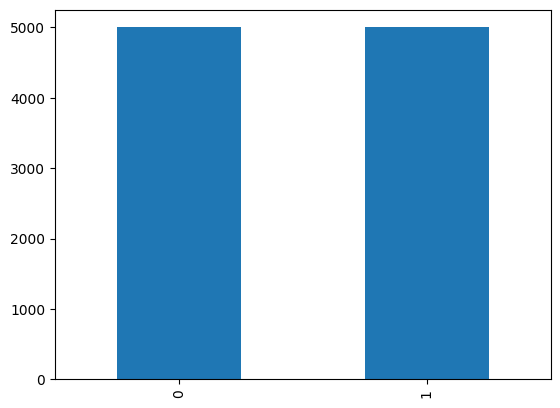

In [ ]:
# check if dataset is balanced (number of positive sentiment = number of negative sentiment)
# by plotting the different classes
Dataframe.sentiment.value_counts().plot(kind = 'bar')

# print the values count
print(Dataframe.sentiment.value_counts())

In [ ]:
X=Dataframe['clean_review']
Y=Dataframe['sentiment']

### Word2Vec
We'll use the Wor2Vec model trained on a part of the Google News dataset. The model contains 300-dimensional vectors for 3 million words and phrases.

In [ ]:
import gensim.downloader as api

model = api.load("word2vec-google-news-300")

Let's get the encoded vector for our text data.

***Instead of having a vector for each word, we'll average the value for each instance.***

In [ ]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
# let's try it on one review

for word in X[20002].split(' '):
  word_vec=model[word]


KeyError: "Key 'stylise' not present"

Sometimes, the model encounters words that are not part of the vocab on which the model was trained on; in this case we should decide what we want the model to do. In our case, words that are not part of the vocab will simply be ignored.

In [ ]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
#Start with an empty dataframe
docs_vectors=pd.DataFrame()
#create another empty dataframe to store each resulting output of the model
temp=pd.DataFrame()
for word in X[20000].split(' '):
  try:
    word_vec=model[word]
    temp = pd.concat([temp, pd.DataFrame(word_vec).T], ignore_index=True)
  except:
    print(str(word), 'not in vocab, it will be ignored')
doc_vector = temp.mean()
docs_vectors = pd.concat([docs_vectors, pd.DataFrame(doc_vector).T], ignore_index=True)
docs_vectors.shape

ricci not in vocab, it will be ignored


(1, 300)

Now let's loop over all the reviews and average their values.

In [ ]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
docs_vectors=pd.DataFrame()

for doc in X:
  temp=pd.DataFrame()
  for word in doc.split(' '):
    try:
      word_vec=model[word]
      temp = pd.concat([temp, pd.DataFrame(word_vec).T], ignore_index=True)
    except:
      pass
  doc_vector = temp.mean()
  docs_vectors = pd.concat([docs_vectors, pd.DataFrame(doc_vector).T], ignore_index=True)



In [ ]:
docs_vectors.shape

(10000, 300)

We end up with 10 000 vectors representing the 10 000 reviews, each one of size 300.

### Classification

The output vectors of the Wor2Vec model, which represent the features extracted from the reviews, are the input to the classifier, Logistic Regression.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split (docs_vectors, Y , test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

# define the LogisticRegression classifier
model = LogisticRegression()

# train the classifier on the training data
model.fit(X_train, y_train)

# get the mean accuracy on the training data
acc_train = model.score(X_train,y_train)
print('Training Accuracy:', acc_train)

# get the mean accuracy on the training data
acc_test = model.score(X_test,y_test)

print('Testing Accuracy:', acc_test)

Training Accuracy: 0.8465
Testing Accuracy: 0.849
